# **1. Import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# **2. Read data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/introdiction to DS/FinalProject/data/UsedListingCarData.csv")

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop_duplicates().reset_index(drop=True)
print(data.shape)
data.head(20)

(24665, 15)


,name,make,model,price,year,engine,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain
0,Xe Ford Everest Titanium 2.0L 4x2 AT 2022,Ford,Everest,950,2022,Dầu 2.0 L,Đen,Đen,30000,7,5,Nhập khẩu,SUV,Số tự động,RFD - Dẫn động cầu sau
1,Xe Lexus RX 200t 2017,Lexus,RX,1990,2017,Xăng 2.0 L,Trắng,-,50000,5,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
2,Xe Mercedes Benz S class S450L Luxury 2020,Mercedes Benz,S class,2790,2020,Xăng 3.0 L,Trắng,Nâu,30000,5,4,Lắp ráp trong nước,Sedan,Số tự động,RFD - Dẫn động cầu sau
3,Xe Toyota Vios 1.5G 2019,Toyota,Vios,448,2019,Xăng 1.5 L,Đen,Kem,46000,5,4,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước
4,Xe Volvo S60 T5 R,Volvo,S60,1279,2021,Xăng 2.0 L,Trắng,Đen,19000,5,4,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian
5,Xe VinFast VF e34 AT 2023,VinFast,VF e34,475,2023,Điện 0.1 L,Xanh,Đen,2300,5,5,Lắp ráp trong nước,Crossover,Số tự động,FWD - Dẫn động cầu trước
6,Xe LandRover Range Rover Supercharged 5.0 2010,LandRover,Range Rover,680,2010,Xăng 5.0 L,Trắng,Kem,88888,5,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
7,Xe Ford Ranger XLS 2.2L 4x2 AT 2017,Ford,Ranger,460,2017,Dầu 2.2 L,Xám,Xám,68000,5,4,Nhập khẩu,Bán tải / Pickup,Số tự động,RFD - Dẫn động cầu sau
8,Xe BMW X5 xDrive40i 2019,BMW,X5,2980,2019,Xăng 3.0 L,Đen,Nâu,32180,7,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
9,Xe Kia Sedona 2.2 DAT Luxury 2019,Kia,Sedona,872,2019,Dầu 2.2 L,Đỏ,Kem,60000,7,5,Lắp ráp trong nước,Van/Minivan,Số tự động,FWD - Dẫn động cầu trước


There are totally  used car listings with 15 columns in the datasets. The main columns include:
1. name: name of car
2. make: automaker
3. model: model of the vehicle
4. price: dealers' resell price
5. year: model year
6. engine: engine specification
7. exterior_color: color of the car
8. interior_color: inside color of the car
9. mileage: mileage of the car
10. num_seats: a number of seats
11. num_doors: a number of doors
12. origin: export domestically or import from abroad
13. style: type of vehicle
14. transmission: automatic or manual transmission type
15. drivetrain: drive type of the car


In [ ]:
for column in data.columns:
  print(column)
  unique_values = data[column].unique()
  print(unique_values)

name
['Xe Ford Everest Titanium 2.0L 4x2 AT 2022' 'Xe Lexus RX 200t 2017'
 'Xe Mercedes Benz S class S450L Luxury 2020' ...
 'Xe LandRover Range Rover Supercharged LWB 5.0 2014'
 'Xe Porsche Cayenne Coupe Platinum Edition 2022'
 'Xe Toyota Corolla J 1.3 MT 2002']
make
['Ford' 'Lexus' 'Mercedes Benz' 'Toyota' 'Volvo' 'VinFast' 'LandRover'
 'BMW' 'Kia' 'Hyundai' 'Porsche' 'Mazda' 'Suzuki' 'Daewoo' 'Peugeot'
 'Mitsubishi' 'Audi' 'Nissan' 'Mini' 'Honda' 'Bentley' 'Chevrolet'
 'Subaru' 'Isuzu' 'Dongben' 'MG' 'Daihatsu' 'Thaco' 'Acura' 'Volkswagen'
 'Maserati' 'Dodge' 'Jeep' 'Rolls Royce' 'Cadillac' 'Infiniti'
 'Lamborghini' 'Renault' 'Citroen' 'Hummer' 'Lincoln' 'Jaguar' 'Zotye'
 'Ssangyong' 'Baic' 'SYM' 'Ferrari' 'Hino' 'Scion' 'Fiat' 'McLaren' 'RAM'
 'Dongfeng' 'Maybach' 'Tobe' 'Hongqi' 'Smart' 'Mekong' 'JRD' 'Samsung'
 'Vinaxuki' 'Haima' 'Lifan' 'Genesis' 'Luxgen' 'Aston Martin' 'Chrysler'
 'UAZ' 'Chery' 'Changan' 'Brilliance']
model
['Everest' 'RX' 'S class' 'Vios' 'S60' 'VF e34' 'Range

# **3. Handle missing data**


In [ ]:
print('Number of exterior_color null: ', data[data['exterior_color'] == '-'].shape[0])
print('Number of interior_color null: ', data[data['interior_color'] == '-'].shape[0])
print('Number of transmission null: ', data[data['transmission'] == '-'].shape[0])
print('Number of drivetrain null: ', data[data['drivetrain'] == '-'].shape[0])


Number of exterior_color null:  24
Number of interior_color null:  951
Number of transmission null:  1
Number of drivetrain null:  4


## 3.1. Transmission and drive train

In [ ]:
data[data['transmission'] == '-']
condition = (data['transmission'] == '-')
data.loc[condition, 'transmission'] = 'Số tay'
data.loc[condition, 'drivetrain'] = 'RFD - Dẫn động cầu sau'

In [ ]:
data[data['drivetrain'] == '-']

,name,make,model,price,year,engine,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain
3010,Xe Kia Morning AT 2011,Kia,Morning,225,2011,Xăng,Nâu,Đen,120000,5,0,Nhập khẩu,Sedan,Số tự động,-
3273,Xe Mercedes Benz C class C250 2011,Mercedes Benz,C class,325,2011,Xăng 1.8 L,Đen,Đen,100000,5,4,Lắp ráp trong nước,Sedan,Số tự động,-
21682,Xe Chevrolet Cruze LS 2011,Chevrolet,Cruze,188,2011,Xăng,Đen,Bạc,65000,5,4,Lắp ráp trong nước,Sedan,Số tay,-


In [ ]:
condition1 = (data['name'] == 'Xe Chevrolet Cruze LS 2011')
data.loc[condition1, 'drivetrain'] = 'FWD - Dẫn động cầu trước'

condition2 = (data['name'] == 'Xe Mercedes Benz C class C250 2011')
data.loc[condition2, 'drivetrain'] = 'FWD - Dẫn động cầu trước'

condition3 = (data['name'] == 'Xe Kia Morning AT 2011')
data.loc[condition3, 'drivetrain'] = 'FWD - Dẫn động cầu trước'

In [ ]:
print('Number of exterior_color null: ', data[data['exterior_color'] == '-'].shape[0])
print('Number of interior_color null: ', data[data['interior_color'] == '-'].shape[0])
print('Number of transmission null: ', data[data['transmission'] == '-'].shape[0])
print('Number of drivetrain null: ', data[data['drivetrain'] == '-'].shape[0])

Number of exterior_color null:  24
Number of interior_color null:  951
Number of transmission null:  0
Number of drivetrain null:  0


## 3.2. Exterior color and Internal color

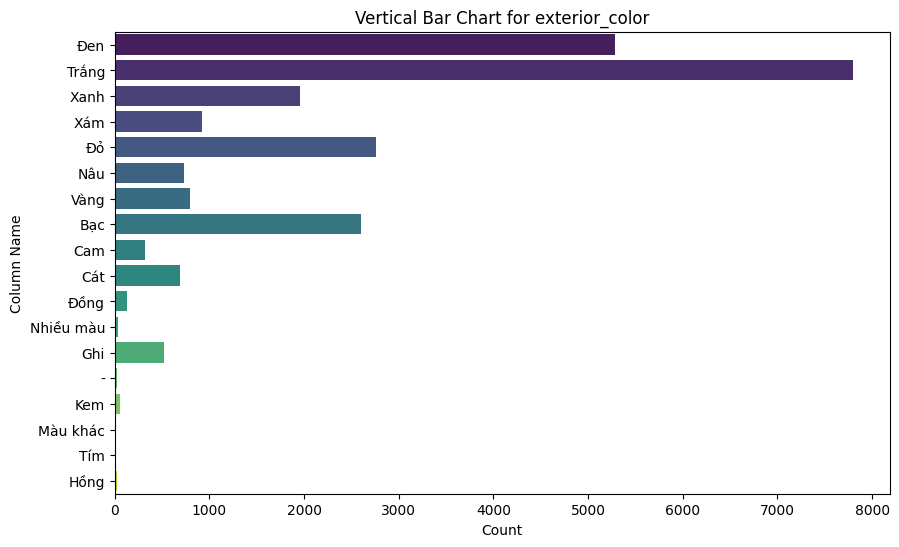

In [ ]:
# Tạo DataFrame mới với cột dữ liệu
data_exterior_color = pd.DataFrame({'Column': data['exterior_color']})

# Sử dụng Seaborn để vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.countplot(y='Column', data=data_exterior_color, palette='viridis')

# Đặt tên cho trục x và y và tiêu đề biểu đồ
plt.xlabel('Count')
plt.ylabel('Column Name')
plt.title('Vertical Bar Chart for exterior_color')

# Hiển thị biểu đồ
plt.show()

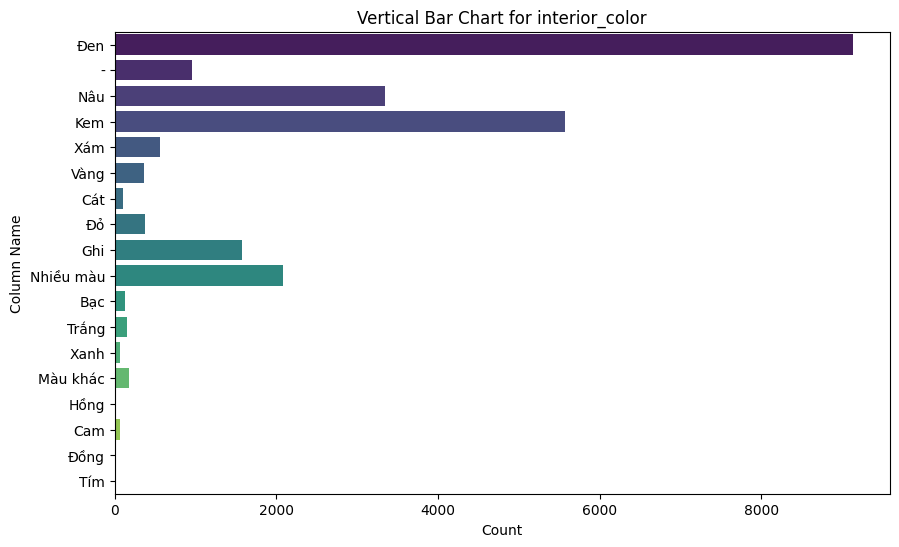

In [ ]:
# Tạo DataFrame mới với cột dữ liệu
data_interior_color = pd.DataFrame({'Column': data['interior_color']})

# Sử dụng Seaborn để vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.countplot(y='Column', data=data_interior_color, palette='viridis')

# Đặt tên cho trục x và y và tiêu đề biểu đồ
plt.xlabel('Count')
plt.ylabel('Column Name')
plt.title('Vertical Bar Chart for interior_color')

# Hiển thị biểu đồ
plt.show()

In [ ]:
data.replace('-', None, inplace=True)

In [ ]:
data[data['exterior_color'].isnull()]

,name,make,model,price,year,engine,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain
229,Xe Toyota Venza 2.7 AWD 2009,Toyota,Venza,480,2009,Xăng 2.7 L,None,Kem,55000,5,5,Nhập khẩu,Crossover,Số tự động,AWD - 4 bánh toàn thời gian
334,Xe MG 5 Luxury 1.5 AT 2022,MG,5,445,2022,Xăng 1.5 L,None,None,58000,5,4,Nhập khẩu,Sedan,Số tự động,FWD - Dẫn động cầu trước
400,Xe Kia Cerato 2.0 AT Premium 2020,Kia,Cerato,509,2020,Xăng 2.0 L,None,None,31000,5,4,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước
668,Xe Mercedes Benz GLC 300 4Matic 2018,Mercedes Benz,GLC,1180,2018,Xăng 2.0 L,None,None,70000,5,5,Lắp ráp trong nước,SUV,Số tự động,AWD - 4 bánh toàn thời gian
677,Xe Toyota Prado GX 2.7 AT 2008,Toyota,Prado,420,2008,Xăng 2.7 L,None,None,0,7,5,Nhập khẩu,SUV,Số tự động,4WD - Dẫn động 4 bánh
916,Xe Honda CRV 2.4 AT 2009,Honda,CRV,310,2009,Xăng 2.4 L,None,None,89000,5,5,Lắp ráp trong nước,SUV,Số tự động,FWD - Dẫn động cầu trước
1625,Xe Audi Q8 55 TFSI S,Audi,Q8,3551,2021,Xăng 3.0 L,None,None,12000,5,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
2351,Xe Porsche Macan 2.0 2015,Porsche,Macan,1390,2015,Xăng 2.0 L,None,None,78050,5,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
2374,Xe Chevrolet Lacetti 2011,Chevrolet,Lacetti,195,2011,Xăng,None,Đen,6789,5,0,Nhập khẩu,Sedan,Số tự động,FWD - Dẫn động cầu trước
2523,Xe Toyota Venza 3.5 AWD 2010,Toyota,Venza,450,2010,Xăng 3.5 L,None,None,71000,5,5,Nhập khẩu,Crossover,Số tự động,AWD - 4 bánh toàn thời gian


In [ ]:
data.loc[229, 'exterior_color'] = 'Nâu'
data.loc[334, 'exterior_color'] = 'Đỏ'
data.loc[334, 'interior_color'] = 'Đen'
data.loc[400, 'exterior_color'] = 'Trắng'
data.loc[400, 'interior_color'] = 'Nhiều màu'
data.loc[668, 'exterior_color'] = 'Trắng'
data.loc[668, 'interior_color'] = 'Nâu'
data.loc[677, 'exterior_color'] = 'Đen'
data.loc[677, 'interior_color'] = 'Kem'
data.loc[916, 'exterior_color'] = 'Nâu'
data.loc[916, 'interior_color'] = 'Đen'
data.loc[1625, 'exterior_color'] = 'Trắng'
data.loc[1625, 'interior_color'] = 'Đen'
data.loc[2351, 'exterior_color'] = 'Xám'
data.loc[2351, 'interior_color'] = 'Nâu'
data.loc[2523, 'exterior_color'] = 'Trắng'
data.loc[2523, 'interior_color'] = 'Kem'
data.loc[2625, 'exterior_color'] = 'Đen'
data.loc[2625, 'interior_color'] = 'Nâu'
data.loc[2662, 'exterior_color'] = 'Đen'
data.loc[3178, 'exterior_color'] = 'Bạc'
data.loc[3178, 'interior_color'] = 'Đen'
data.loc[3325, 'exterior_color'] = 'Trắng'
data.loc[3325, 'interior_color'] = 'Nâu'
data.loc[3449, 'exterior_color'] = 'Đen'
data.loc[3449, 'interior_color'] = 'Nâu'
data.loc[3520, 'exterior_color'] = 'Nâu'
data.loc[3520, 'interior_color'] = 'Nâu'
data.loc[3631, 'exterior_color'] = 'Đen'
data.loc[3631, 'interior_color'] = 'Đen'
data.loc[3632, 'exterior_color'] = 'Trắng'
data.loc[3632, 'interior_color'] = 'Nâu'
data.loc[3703, 'exterior_color'] = 'Trắng'
data.loc[3703, 'interior_color'] = 'Đen'
data.loc[3828, 'exterior_color'] = 'Đen'
data.loc[3828, 'interior_color'] = 'Kem'
data.loc[4297, 'exterior_color'] = 'Trắng'
data.loc[4297, 'interior_color'] = 'Kem'
data.loc[4563, 'exterior_color'] = 'Đen'
data.loc[4563, 'interior_color'] = 'Kem'
data['exterior_color'].fillna(data['exterior_color'].mode()[0], inplace=True)

In [ ]:
data[data['interior_color'].isnull()]

,name,make,model,price,year,engine,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain
1,Xe Lexus RX 200t 2017,Lexus,RX,1990,2017,Xăng 2.0 L,Trắng,None,50000,5,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
74,Xe VinFast Lux A 2.0 Tiêu chuẩn 2022,VinFast,Lux A 2.0,630,2022,Xăng 2.0 L,Đỏ,None,34000,5,4,Lắp ráp trong nước,Sedan,Số tự động,RFD - Dẫn động cầu sau
90,Xe LandRover Range Rover SVAutobiography LWB 3...,LandRover,Range Rover,8790,2020,Xăng 3.0 L,Nhiều màu,None,26000,4,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian
152,Xe MG ZS Standard 1.5 AT 2WD 2023,MG,ZS,445,2023,Xăng 1.5 L,Trắng,None,0,5,5,Nhập khẩu,Crossover,Số tự động,FWD - Dẫn động cầu trước
181,Xe Toyota Prado VX 2.7L 2022,Toyota,Prado,2580,2022,Xăng 2.7 L,Đỏ,None,50000,7,5,Nhập khẩu,SUV,Số tự động,4WD - Dẫn động 4 bánh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24428,Xe Mazda 3 1.5 AT 2018,Mazda,3,430,2018,Xăng 1.5 L,Trắng,None,0,5,4,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước
24430,Xe Chevrolet Spark LT 0.8 MT 2009,Chevrolet,Spark,75,2009,Xăng 0.8 L,Trắng,None,0,5,5,Lắp ráp trong nước,Hatchback,Số tay,FWD - Dẫn động cầu trước
24433,Xe Hyundai Getz 1.1 MT 2008,Hyundai,Getz,100,2008,Xăng 1.1 L,Bạc,None,0,5,5,Nhập khẩu,Hatchback,Số tay,FWD - Dẫn động cầu trước
24445,Xe Kia Frontier K165 2017,Kia,Frontier,230,2017,Dầu,Xanh,None,200000,3,3,Lắp ráp trong nước,Truck,Số tay,RFD - Dẫn động cầu sau


In [ ]:
data['interior_color'].fillna(data['interior_color'].mode()[0], inplace=True)

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)
print(data.shape)

(24641, 15)


## 3.3. Engine

In [ ]:
data[['fuel']] = data['engine'].str.extract(r'([^\d]+)')
data[['liter']] = data['engine'].str.extract(r'([\d.]+) L')
data['fuel'] = data['fuel'].str.strip()
data['liter'] = pd.to_numeric(data['liter'], errors='coerce')
data.drop('engine', axis=1, inplace=True)
data

,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
0,Xe Ford Everest Titanium 2.0L 4x2 AT 2022,Ford,Everest,950,2022,Đen,Đen,30000,7,5,Nhập khẩu,SUV,Số tự động,RFD - Dẫn động cầu sau,Dầu,2.00
1,Xe Lexus RX 200t 2017,Lexus,RX,1990,2017,Trắng,Đen,50000,5,5,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00
2,Xe Mercedes Benz S class S450L Luxury 2020,Mercedes Benz,S class,2790,2020,Trắng,Nâu,30000,5,4,Lắp ráp trong nước,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,3.00
3,Xe Toyota Vios 1.5G 2019,Toyota,Vios,448,2019,Đen,Kem,46000,5,4,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.50
4,Xe Volvo S60 T5 R,Volvo,S60,1279,2021,Trắng,Đen,19000,5,4,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24636,Xe Ford Ranger XLS 2.2L 4x2 MT 2015,Ford,Ranger,500,2015,Bạc,Đen,0,5,4,Nhập khẩu,Bán tải / Pickup,Số tay,RFD - Dẫn động cầu sau,Dầu,2.20
24637,Xe Chevrolet Lacetti 1.6 2011,Chevrolet,Lacetti,195,2011,Vàng,Ghi,0,5,4,Lắp ráp trong nước,Sedan,Số tay,FWD - Dẫn động cầu trước,Xăng,1.60
24638,Xe Kia Morning EX MTH 2013,Kia,Morning,220,2013,Trắng,Đen,0,5,5,Lắp ráp trong nước,Hatchback,Số tay,FWD - Dẫn động cầu trước,Xăng,1.25
24639,Xe Kia Morning Si AT 2016,Kia,Morning,365,2016,Trắng,Xám,0,5,5,Lắp ráp trong nước,Hatchback,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.25


In [ ]:
mean_liter = data['liter'].mean()
data['liter'] = data['liter'].fillna(mean_liter)

## 3.4. Number of doors

In [ ]:
data.describe()

,price,year,mileage,num_seats,num_doors,liter
count,24641.000000,24641.000000,2.464100e+04,24641.000000,24641.000000,24319.000000
mean,933.768394,2016.255834,4.142358e+05,5.575301,4.478471,2.056230
std,1610.881909,5.343346,3.137158e+07,1.728374,0.760928,0.848638
min,6.000000,1989.000000,0.000000e+00,1.000000,0.000000,0.100000
25%,318.000000,2014.000000,5.000000e+03,5.000000,4.000000,1.500000
50%,496.000000,2018.000000,3.500000e+04,5.000000,5.000000,2.000000
75%,850.000000,2020.000000,7.200000e+04,7.000000,5.000000,2.400000
max,54000.000000,2023.000000,4.294967e+09,47.000000,45.000000,12.900000


In [ ]:
z_scores = stats.zscore(data['num_doors'])

threshold = 5

outliers = data[abs(z_scores) > threshold]
print(outliers.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
outliers

(155, 16)


,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
198,"Xe Thaco Foton 2,2 2007",Thaco,Foton,58,2007,Xanh,Xanh,11,3,0,Lắp ráp trong nước,SUV,Số tay,RFD - Dẫn động cầu sau,Dầu,2.05623
324,Xe Lexus RX 300 2021,Lexus,RX,2980,2021,Đen,Nâu,15000,5,0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00000
619,Xe Lexus LS 460L 2008,Lexus,LS,780,2008,Đen,Đen,76000,5,0,Nhập khẩu,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,4.60000
825,Xe Peugeot 5008 1.6 Allure 2018,Peugeot,5008,700,2018,Trắng,Đen,60000,7,0,Lắp ráp trong nước,SUV,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.60000
841,Xe Mercedes Benz C class C 2021,Mercedes Benz,C class,1350,2021,Trắng,Nâu,40000,5,0,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,2.05623
843,Xe Toyota Fortuner 2.7V 4x2 TRD 2013,Toyota,Fortuner,445,2013,Trắng,Kem,112000,7,0,Lắp ráp trong nước,SUV,Số tự động,RFD - Dẫn động cầu sau,Xăng,2.05623
1050,Xe Lamborghini Lambro Trước 1990,Lamborghini,Khác,35,1989,Trắng,Đen,60000,2,0,Nhập khẩu,Sedan,Số tay,RFD - Dẫn động cầu sau,Xăng,2.05623
1185,Xe Lexus GX 460 2016,Lexus,GX,2990,2016,Đen,Kem,60000,7,0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,4.60000
1375,Xe Peugeot 5008 2020,Peugeot,5008,765,2020,Xanh,Đen,41542,7,0,Lắp ráp trong nước,Crossover,Số tự động,RFD - Dẫn động cầu sau,Xăng,2.05623
1641,Xe VinFast Lux SA 2.0 Premium 2.0 AT 2021,VinFast,Lux SA 2.0,848,2021,Trắng,Cam,40000,7,0,Lắp ráp trong nước,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00000


In [ ]:
data.loc[22288, 'num_doors'] = 5

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data[data['num_doors'] == 0]

,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
198,"Xe Thaco Foton 2,2 2007",Thaco,Foton,58,2007,Xanh,Xanh,11,3,0,Lắp ráp trong nước,SUV,Số tay,RFD - Dẫn động cầu sau,Dầu,NaN
324,Xe Lexus RX 300 2021,Lexus,RX,2980,2021,Đen,Nâu,15000,5,0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00
619,Xe Lexus LS 460L 2008,Lexus,LS,780,2008,Đen,Đen,76000,5,0,Nhập khẩu,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,4.60
825,Xe Peugeot 5008 1.6 Allure 2018,Peugeot,5008,700,2018,Trắng,Đen,60000,7,0,Lắp ráp trong nước,SUV,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.60
841,Xe Mercedes Benz C class C 2021,Mercedes Benz,C class,1350,2021,Trắng,Nâu,40000,5,0,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,NaN
843,Xe Toyota Fortuner 2.7V 4x2 TRD 2013,Toyota,Fortuner,445,2013,Trắng,Kem,112000,7,0,Lắp ráp trong nước,SUV,Số tự động,RFD - Dẫn động cầu sau,Xăng,NaN
1050,Xe Lamborghini Lambro Trước 1990,Lamborghini,Khác,35,1989,Trắng,Đen,60000,2,0,Nhập khẩu,Sedan,Số tay,RFD - Dẫn động cầu sau,Xăng,NaN
1185,Xe Lexus GX 460 2016,Lexus,GX,2990,2016,Đen,Kem,60000,7,0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,4.60
1375,Xe Peugeot 5008 2020,Peugeot,5008,765,2020,Xanh,Đen,41542,7,0,Lắp ráp trong nước,Crossover,Số tự động,RFD - Dẫn động cầu sau,Xăng,NaN
1641,Xe VinFast Lux SA 2.0 Premium 2.0 AT 2021,VinFast,Lux SA 2.0,848,2021,Trắng,Cam,40000,7,0,Lắp ráp trong nước,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00


In [ ]:
data[data['num_doors'] == 0].count()

name              154
make              154
model             154
price             154
year              154
exterior_color    154
interior_color    154
mileage           154
num_seats         154
num_doors         154
origin            154
style             154
transmission      154
drivetrain        154
fuel              154
liter              83
dtype: int64

In [ ]:
data['num_doors'] = data['num_doors'].replace(0, None)

In [ ]:
name_to_doors_mapping = data.set_index('name')['num_doors'].to_dict()
data['num_doors'] = data['num_doors'].fillna(data['name'].map(name_to_doors_mapping))

In [ ]:
data[data['num_doors'].isna()].shape
data[data['num_doors'].isna()]

,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
198,"Xe Thaco Foton 2,2 2007",Thaco,Foton,58,2007,Xanh,Xanh,11,3,NaN,Lắp ráp trong nước,SUV,Số tay,RFD - Dẫn động cầu sau,Dầu,NaN
825,Xe Peugeot 5008 1.6 Allure 2018,Peugeot,5008,700,2018,Trắng,Đen,60000,7,NaN,Lắp ráp trong nước,SUV,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.6
841,Xe Mercedes Benz C class C 2021,Mercedes Benz,C class,1350,2021,Trắng,Nâu,40000,5,NaN,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,NaN
843,Xe Toyota Fortuner 2.7V 4x2 TRD 2013,Toyota,Fortuner,445,2013,Trắng,Kem,112000,7,NaN,Lắp ráp trong nước,SUV,Số tự động,RFD - Dẫn động cầu sau,Xăng,NaN
1050,Xe Lamborghini Lambro Trước 1990,Lamborghini,Khác,35,1989,Trắng,Đen,60000,2,NaN,Nhập khẩu,Sedan,Số tay,RFD - Dẫn động cầu sau,Xăng,NaN
1375,Xe Peugeot 5008 2020,Peugeot,5008,765,2020,Xanh,Đen,41542,7,NaN,Lắp ráp trong nước,Crossover,Số tự động,RFD - Dẫn động cầu sau,Xăng,NaN
2372,Xe Chevrolet Lacetti 2011,Chevrolet,Lacetti,195,2011,Trắng,Đen,6789,5,NaN,Nhập khẩu,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,NaN
2535,Xe LandRover Defender 2022,LandRover,Defender,4699,2022,Xanh,Đen,11900,7,NaN,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,NaN
3008,Xe Kia Morning AT 2011,Kia,Morning,225,2011,Nâu,Đen,120000,5,NaN,Nhập khẩu,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,NaN
4122,Xe Lexus IS 250 2011,Lexus,IS,1250,2011,Đỏ,Kem,0,5,NaN,Nhập khẩu,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,2.5


In [ ]:
new_num_door = [2, 5, 4, 5, 2, 5, 4, 5, 4, 4, 4, 4, 4, 2, 3, 2, 2, 2, 2,
                4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4,
                4, 4, 4, 4, 4, 4, 5, 4, 2, 5, 5, 2, 7, 2, 4, 4, 4, 4, 4, 5,
                2, 2, 5, 2, 2, 2, 4, 4, 2, 5, 2, 4, 2, 2, 4, 5, 4, 4, 2]

data.loc[data['num_doors'].isna(), 'num_doors'] = new_num_door

In [ ]:
data.isna().sum()

name              0
make              0
model             0
price             0
year              0
exterior_color    0
interior_color    0
mileage           0
num_seats         0
num_doors         0
origin            0
style             0
transmission      0
drivetrain        0
fuel              0
liter             0
dtype: int64

# **4. Handle outliers**

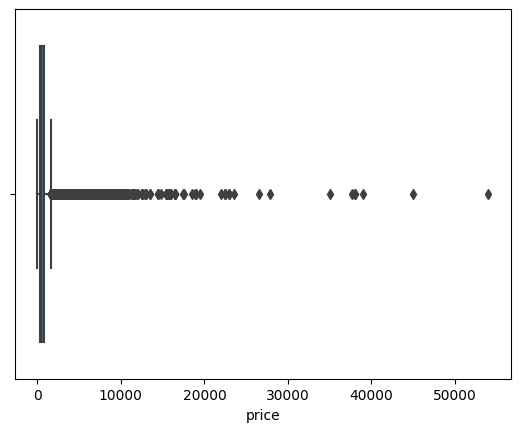

In [ ]:
sns.boxplot(x=data['price'])
plt.show()


In [ ]:
z_scores = stats.zscore(data['price'])

threshold = 5

outliers = data[abs(z_scores) > threshold]
print(outliers.shape)
outliers

(165, 16)


,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
169,Xe Mercedes Benz AMG GT R 2021,Mercedes Benz,AMG GT,11500,2021,Trắng,Đen,1500,2,2.0,Nhập khẩu,Coupe,Số tự động,RFD - Dẫn động cầu sau,Xăng,4.00000
368,Xe Lexus LX 600 Vip 2023,Lexus,LX,9550,2023,Xanh,Nâu,30000,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,3.40000
589,Xe Lexus LX 600 Vip 2023,Lexus,LX,9550,2023,Xanh,Nâu,29000,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,3.40000
666,Xe Mercedes Benz Maybach S680 4Matic 2022,Mercedes Benz,Maybach,14800,2022,Đen,Kem,0,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.00000
863,Xe Rolls Royce Phantom EWB 2012,Rolls Royce,Phantom,17499,2012,Đen,Kem,18000,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
883,Xe LandRover Range Rover SVAutobiography LWB 3...,LandRover,Range Rover,8990,2021,Trắng,Nâu,16000,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,3.00000
888,Xe Rolls Royce Cullinan Black Badge 6.75 V12 2022,Rolls Royce,Cullinan,22500,2022,Đen,Nâu,0,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
952,Xe Mercedes Benz G class G63 AMG 2021,Mercedes Benz,G class,10900,2021,Đen,Đỏ,100,5,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,4.00000
1016,Xe LandRover Range Rover SVAutobiography LWB 3...,LandRover,Range Rover,9300,2021,Đỏ,Nâu,10000,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,3.00000
1156,Xe Porsche 911 Targa 4S 2021,Porsche,911,9968,2021,Xanh,Nâu,5000,2,2.0,Nhập khẩu,Convertible/Cabriolet,Số tự động,RFD - Dẫn động cầu sau,Xăng,3.00000


In [ ]:
data[data['price'] > 20000]

,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
888,Xe Rolls Royce Cullinan Black Badge 6.75 V12 2022,Rolls Royce,Cullinan,22500,2022,Đen,Nâu,0,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
2676,Xe Rolls Royce Ghost Series II EWB 2021,Rolls Royce,Ghost,37680,2021,Đen,Nâu,7000,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.60000
3237,Xe Rolls Royce Phantom EWB 2015,Rolls Royce,Phantom,22500,2015,Nâu,Vàng,68000,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
7229,Xe Bentley Mulsanne 2019,Bentley,Mulsanne,26500,2019,Nhiều màu,Nâu,8000,5,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.05623
8034,Xe Rolls Royce Cullinan Black Badge 6.75 V12 2021,Rolls Royce,Cullinan,35000,2021,Đen,Đỏ,0,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
9014,Xe Rolls Royce Cullinan 6.75 V12 2022,Rolls Royce,Cullinan,45000,2022,Đen,Kem,2000,4,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
9838,Xe McLaren 765LT Spider 2020,McLaren,765LT,39000,2020,Vàng,Đen,2000,2,2.0,Nhập khẩu,Convertible/Cabriolet,Số tự động,RFD - Dẫn động cầu sau,Xăng,4.00000
10188,Xe Rolls Royce Phantom EWB 2015,Rolls Royce,Phantom,21999,2015,Nhiều màu,Vàng,80000,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.70000
11412,Xe Rolls Royce Ghost Series II EWB 2021,Rolls Royce,Ghost,38000,2021,Đen,Nâu,6000,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.60000
12367,Xe Rolls Royce Ghost Series II EWB 2021,Rolls Royce,Ghost,38000,2021,Đen,Nâu,7000,4,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,6.60000


In [ ]:
data.loc[9014, 'price'] = 40000
data.loc[24109, 'price'] = 39000

In [ ]:
z_scores = stats.zscore(data['mileage'])

threshold = 3

outliers = data[abs(z_scores) > threshold]
print(outliers.shape)
outliers

(10, 16)


,name,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
11892,Xe Toyota Fortuner 2.7V 4x2 AT 2015,Toyota,Fortuner,460,2015,Đen,Kem,175000000,7,5.0,Lắp ráp trong nước,SUV,Số tự động,RFD - Dẫn động cầu sau,Xăng,2.7
14289,Xe Toyota Camry 2.4G 2007,Toyota,Camry,275,2007,Đen,Kem,150000000,5,4.0,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,2.4
14414,Xe Hyundai Kona 1.6 Turbo 2018,Hyundai,Kona,510,2018,Đen,Đen,120000000,5,5.0,Lắp ráp trong nước,Crossover,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.6
15069,Xe Toyota Vios 1.5G 2017,Toyota,Vios,402,2017,Cát,Kem,700000000,5,4.0,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.5
15650,Xe Kia Morning LX 1.1 MT 2011,Kia,Morning,119,2011,Bạc,Nhiều màu,168000000,5,5.0,Lắp ráp trong nước,Hatchback,Số tay,FWD - Dẫn động cầu trước,Xăng,1.1
15750,Xe Mercedes Benz E class E200 2005,Mercedes Benz,E class,165,2005,Bạc,Đen,120000000,5,4.0,Nhập khẩu,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,1.8
15771,Xe Honda Accord 2.2 AT 1995,Honda,Accord,105,1995,Đen,Ghi,4294967295,5,4.0,Nhập khẩu,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,2.2
16784,Xe Ford Laser Deluxe 1.6 MT 2001,Ford,Laser,74,2001,Xanh,Xám,2268580000,5,4.0,Lắp ráp trong nước,Sedan,Số tay,FWD - Dẫn động cầu trước,Xăng,1.6
21596,Xe Mitsubishi Pajero 3.0 2004,Mitsubishi,Pajero,90,2004,Xanh,Ghi,150000000,5,5.0,Nhập khẩu,SUV,Số tay,4WD - Dẫn động 4 bánh,Xăng,3.0
22210,Xe Toyota Fortuner 2.7V 4x4 AT 2011,Toyota,Fortuner,340,2011,Xám,Kem,110000000,7,5.0,Lắp ráp trong nước,SUV,Số tự động,4WD - Dẫn động 4 bánh,Xăng,2.7


Important outlier => Don't remove

In [ ]:
data.to_csv("/content/drive/MyDrive/introdiction to DS/FinalProject/data/UsedCarListingCleaning.csv")